In [8]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('daily-min-temperatures.csv')

In [10]:
# Check the dataset
print(df.head())

         Date  Temp
0  01-01-1981  20.7
1  02-01-1981  17.9
2  03-01-1981  18.8
3  04-01-1981  14.6
4  05-01-1981  15.8


In [11]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [12]:
# Only use temperature for clustering (you can engineer more features)
X = df[['Temp']].values

In [13]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)  # You can tune these values
db.fit(X_scaled)

DBSCAN()

In [15]:
# Add cluster labels to the original DataFrame
df['Cluster'] = db.labels_

In [16]:
print(df.head())


        Date  Temp  Cluster
0 1981-01-01  20.7        0
1 1981-01-02  17.9        0
2 1981-01-03  18.8        0
3 1981-01-04  14.6        0
4 1981-01-05  15.8        0


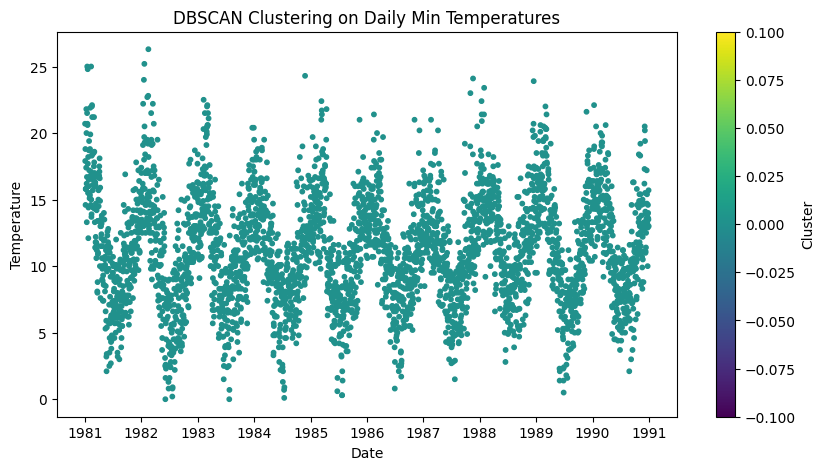

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['Temp'], c=df['Cluster'], cmap='viridis', s=10)
plt.title("DBSCAN Clustering on Daily Min Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.colorbar(label='Cluster')
plt.show()